In [722]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast
import plotly.express as px

sns.set()

In [723]:
# EDA

**Load the data**

In [724]:
raw_df_trees = pd.read_csv("cleaned_tree_data_5.csv", encoding="ISO-8859-1", dtype='unicode')

In [725]:
len(raw_df_trees)

45345

In [726]:
raw_df_trees.head(3)

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,diameter_base_height,stems,overhead_utilities,land_use,condition,stormwater_benefits_dollar_value,stormwater_benefits_runoff_elim,property_value_benefits_dollarvalue,property_value_benefits_leaf_surface_area,energy_benefits_electricity_dollar_value,energy_benefits_gas_dollar_value,air_quality_benfits_o3dep_dollar_value,air_quality_benfits_o3dep_lbs,air_quality_benfits_vocavd_dollar_value,air_quality_benfits_vocavd_lbs,air_quality_benfits_no2dep_dollar_value,air_quality_benfits_no2dep_lbs,air_quality_benfits_no2avd_dollar_value,air_quality_benfits_no2avd_lbs,air_quality_benfits_so2dep_dollar_value,air_quality_benfits_so2dep_lbs,air_quality_benfits_so2avd_dollar_value,air_quality_benfits_so2avd_lbs,air_quality_benfits_pm10depdollar_value,air_quality_benfits_pm10dep_lbs,air_quality_benfits_pm10avd_dollar_value,air_quality_benfits_pm10avd_lbs,air_quality_benfits_total_dollar_value,air_quality_benfits_total_lbs,co2_benefits_dollar_value,co2_benefits_sequestered_lbs,co2_benefits_sequestered_value,co2_benefits_avoided_lbs,co2_benefits_avoided_value,co2_benefits_decomp_lbs,co2_benefits_maint_lbs,co2_benefits_totalco2_lbs,overall_benefits_dollar_value,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428.0,MONTICELLO ST,Stump,Stump,0.7428040854224698,0.2404828226555246,10.0,2.0,Well or Pit,16.0,1.0,Yes,Vacant,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Homewood North,9.0,13.0,42003130200.0,2.0,13.0,5.0,3-17,40.45816863,-79.88972391
1,1946899269,220.0,BALVER AVE,Linden: Littleleaf,Tilia cordata,30.952598752598753,8.833264033264033,99.0,99.0,Open or Unrestricted,22.0,1.0116038126813096,No,Residential,NaN,13.9466942599,1743.33678249,21.9848130518,36.5383334693,15.776457219200001,61.0683188097,2.36084749382,0.51434585922,0.07213824704789999,0.031228678375699998,0.992383683567,0.216205595548,3.7023061135300006,0.806602639112,0.27490061234900004,0.078994428836,1.4077237315600002,0.404518313668,2.18532822434,0.26297571893399996,0.461810057269,0.0555728107424,11.457438163399999,2.37044404444,0.944600765534,115.328075315,0.847430697411,277.540792624,2.0393697442,-96.34547132700001,-13.7087961535,282.814600458,125.17832227,Oakwood,2.0,28.0,42003562800.0,5.0,28.0,6.0,1-19,40.42926879,-80.06786821
2,1431517397,2822.0,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,6.0,1.0,No,Commercial/Industrial,Fair,3.97485820864,496.85727608,51.529092533100005,85.6403537258,3.3888203575599998,16.08474051,0.464026396623,0.10109507551699999,0.017643365156499998,0.00763782041405,0.20039118506499998,0.0436582102539,0.8759662842679999,0.190842327727,0.0587249372819,0.0168749819776,0.302735385882,0.0869929269772,0.444639118191,0.05350651241769999,0.110526048628,0.013300366862600001,2.4746527210900005,0.5139082221469999,0.314951871182,45.2879502377,0.33277585834600004,59.616419265,0.438061448759,-6.86863949566,-3.73876258732,94.2969674194,77.7671162015,South Side Flats,3.0,16.0,42003160900.0,3.0,16.0,3.0,4-24,40.42679667,-79.96503491


**Filter out the stums from the dataframe**

In [727]:
df_trees = raw_df_trees[(raw_df_trees['common_name'] != 'Stump') & 
                       (raw_df_trees['scientific_name'] != 'Stump') &
                       (raw_df_trees['common_name'] != 'Vacant Site Small') & 
                       (raw_df_trees['common_name'] != 'Vacant Site Medium') & 
                       (raw_df_trees['common_name'] != 'Vacant Site Not Suitable') & 
                       (raw_df_trees['common_name'] != 'Vacant Site Large')]

In [728]:
len(df_trees)

40075

In [729]:
df_trees.head(3)

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,diameter_base_height,stems,overhead_utilities,land_use,condition,stormwater_benefits_dollar_value,stormwater_benefits_runoff_elim,property_value_benefits_dollarvalue,property_value_benefits_leaf_surface_area,energy_benefits_electricity_dollar_value,energy_benefits_gas_dollar_value,air_quality_benfits_o3dep_dollar_value,air_quality_benfits_o3dep_lbs,air_quality_benfits_vocavd_dollar_value,air_quality_benfits_vocavd_lbs,air_quality_benfits_no2dep_dollar_value,air_quality_benfits_no2dep_lbs,air_quality_benfits_no2avd_dollar_value,air_quality_benfits_no2avd_lbs,air_quality_benfits_so2dep_dollar_value,air_quality_benfits_so2dep_lbs,air_quality_benfits_so2avd_dollar_value,air_quality_benfits_so2avd_lbs,air_quality_benfits_pm10depdollar_value,air_quality_benfits_pm10dep_lbs,air_quality_benfits_pm10avd_dollar_value,air_quality_benfits_pm10avd_lbs,air_quality_benfits_total_dollar_value,air_quality_benfits_total_lbs,co2_benefits_dollar_value,co2_benefits_sequestered_lbs,co2_benefits_sequestered_value,co2_benefits_avoided_lbs,co2_benefits_avoided_value,co2_benefits_decomp_lbs,co2_benefits_maint_lbs,co2_benefits_totalco2_lbs,overall_benefits_dollar_value,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
1,1946899269,220.0,BALVER AVE,Linden: Littleleaf,Tilia cordata,30.952598752598753,8.833264033264033,99.0,99.0,Open or Unrestricted,22.0,1.0116038126813096,No,Residential,NaN,13.9466942599,1743.33678249,21.9848130518,36.5383334693,15.776457219200001,61.0683188097,2.36084749382,0.51434585922,0.07213824704789999,0.031228678375699998,0.992383683567,0.216205595548,3.7023061135300006,0.806602639112,0.27490061234900004,0.078994428836,1.4077237315600002,0.404518313668,2.18532822434,0.26297571893399996,0.461810057269,0.0555728107424,11.457438163399999,2.37044404444,0.944600765534,115.328075315,0.847430697411,277.540792624,2.0393697442,-96.34547132700001,-13.7087961535,282.814600458,125.17832227,Oakwood,2.0,28.0,42003562800.0,5.0,28.0,6.0,1-19,40.42926879,-80.06786821
2,1431517397,2822.0,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,6.0,1.0,No,Commercial/Industrial,Fair,3.97485820864,496.85727608,51.529092533100005,85.6403537258,3.3888203575599998,16.08474051,0.464026396623,0.10109507551699999,0.017643365156499998,0.00763782041405,0.20039118506499998,0.0436582102539,0.8759662842679999,0.190842327727,0.0587249372819,0.0168749819776,0.302735385882,0.0869929269772,0.444639118191,0.05350651241769999,0.110526048628,0.013300366862600001,2.4746527210900005,0.5139082221469999,0.314951871182,45.2879502377,0.33277585834600004,59.616419265,0.438061448759,-6.86863949566,-3.73876258732,94.2969674194,77.7671162015,South Side Flats,3.0,16.0,42003160900.0,3.0,16.0,3.0,4-24,40.42679667,-79.96503491
3,994063598,608.0,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,7.0,1.0,Conflicting,Residential,Fair,4.77566237175,596.957796467,43.1845240318,71.7718425022,5.3962179528,24.220928722800004,0.742734848787,0.161815871195,0.027087080466999997,0.0117260088601,0.312209046574,0.0680194001252,1.35699869677,0.295642417598,0.0864851564018,0.024852056437400002,0.481897783617,0.13847637460200002,0.6875155775640001,0.08273352317260001,0.17068357443,0.020539539642599997,3.8656117646199997,0.803805191634,0.39531443276699996,33.5649564029,0.246635299649,94.9307304536,0.6975510073729999,-5.77618257091,-4.3618896851999995,118.35761460100001,81.8382592766,East Allegheny,1.0,23.0,42003563200.0,1.0,23.0,1.0,1-6,40.45550338,-79.99927602


In [730]:
df_trees.dtypes

id                                           object
address_number                               object
street                                       object
common_name                                  object
scientific_name                              object
height                                       object
width                                        object
growth_space_length                          object
growth_space_width                           object
growth_space_type                            object
diameter_base_height                         object
stems                                        object
overhead_utilities                           object
land_use                                     object
condition                                    object
stormwater_benefits_dollar_value             object
stormwater_benefits_runoff_elim              object
property_value_benefits_dollarvalue          object
property_value_benefits_leaf_surface_area    object
energy_benef

In [731]:
df_trees.columns

Index(['id', 'address_number', 'street', 'common_name', 'scientific_name',
       'height', 'width', 'growth_space_length', 'growth_space_width',
       'growth_space_type', 'diameter_base_height', 'stems',
       'overhead_utilities', 'land_use', 'condition',
       'stormwater_benefits_dollar_value', 'stormwater_benefits_runoff_elim',
       'property_value_benefits_dollarvalue',
       'property_value_benefits_leaf_surface_area',
       'energy_benefits_electricity_dollar_value',
       'energy_benefits_gas_dollar_value',
       'air_quality_benfits_o3dep_dollar_value',
       'air_quality_benfits_o3dep_lbs',
       'air_quality_benfits_vocavd_dollar_value',
       'air_quality_benfits_vocavd_lbs',
       'air_quality_benfits_no2dep_dollar_value',
       'air_quality_benfits_no2dep_lbs',
       'air_quality_benfits_no2avd_dollar_value',
       'air_quality_benfits_no2avd_lbs',
       'air_quality_benfits_so2dep_dollar_value',
       'air_quality_benfits_so2dep_lbs',
       'air_qual

In [732]:
# df_trees['tree_count'] = pd.Series([1 for x in range(len(df_trees.index))])
df_trees['tree_count'] = 1

<ipython-input-732-e9b6f18fe45a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [733]:
df_trees.head(3)

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,diameter_base_height,stems,overhead_utilities,land_use,condition,stormwater_benefits_dollar_value,stormwater_benefits_runoff_elim,property_value_benefits_dollarvalue,property_value_benefits_leaf_surface_area,energy_benefits_electricity_dollar_value,energy_benefits_gas_dollar_value,air_quality_benfits_o3dep_dollar_value,air_quality_benfits_o3dep_lbs,air_quality_benfits_vocavd_dollar_value,air_quality_benfits_vocavd_lbs,air_quality_benfits_no2dep_dollar_value,air_quality_benfits_no2dep_lbs,air_quality_benfits_no2avd_dollar_value,air_quality_benfits_no2avd_lbs,air_quality_benfits_so2dep_dollar_value,air_quality_benfits_so2dep_lbs,air_quality_benfits_so2avd_dollar_value,air_quality_benfits_so2avd_lbs,air_quality_benfits_pm10depdollar_value,air_quality_benfits_pm10dep_lbs,air_quality_benfits_pm10avd_dollar_value,air_quality_benfits_pm10avd_lbs,air_quality_benfits_total_dollar_value,air_quality_benfits_total_lbs,co2_benefits_dollar_value,co2_benefits_sequestered_lbs,co2_benefits_sequestered_value,co2_benefits_avoided_lbs,co2_benefits_avoided_value,co2_benefits_decomp_lbs,co2_benefits_maint_lbs,co2_benefits_totalco2_lbs,overall_benefits_dollar_value,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,tree_count
1,1946899269,220.0,BALVER AVE,Linden: Littleleaf,Tilia cordata,30.952598752598753,8.833264033264033,99.0,99.0,Open or Unrestricted,22.0,1.0116038126813096,No,Residential,NaN,13.9466942599,1743.33678249,21.9848130518,36.5383334693,15.776457219200001,61.0683188097,2.36084749382,0.51434585922,0.07213824704789999,0.031228678375699998,0.992383683567,0.216205595548,3.7023061135300006,0.806602639112,0.27490061234900004,0.078994428836,1.4077237315600002,0.404518313668,2.18532822434,0.26297571893399996,0.461810057269,0.0555728107424,11.457438163399999,2.37044404444,0.944600765534,115.328075315,0.847430697411,277.540792624,2.0393697442,-96.34547132700001,-13.7087961535,282.814600458,125.17832227,Oakwood,2.0,28.0,42003562800.0,5.0,28.0,6.0,1-19,40.42926879,-80.06786821,1
2,1431517397,2822.0,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,6.0,1.0,No,Commercial/Industrial,Fair,3.97485820864,496.85727608,51.529092533100005,85.6403537258,3.3888203575599998,16.08474051,0.464026396623,0.10109507551699999,0.017643365156499998,0.00763782041405,0.20039118506499998,0.0436582102539,0.8759662842679999,0.190842327727,0.0587249372819,0.0168749819776,0.302735385882,0.0869929269772,0.444639118191,0.05350651241769999,0.110526048628,0.013300366862600001,2.4746527210900005,0.5139082221469999,0.314951871182,45.2879502377,0.33277585834600004,59.616419265,0.438061448759,-6.86863949566,-3.73876258732,94.2969674194,77.7671162015,South Side Flats,3.0,16.0,42003160900.0,3.0,16.0,3.0,4-24,40.42679667,-79.96503491,1
3,994063598,608.0,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,7.0,1.0,Conflicting,Residential,Fair,4.77566237175,596.957796467,43.1845240318,71.7718425022,5.3962179528,24.220928722800004,0.742734848787,0.161815871195,0.027087080466999997,0.0117260088601,0.312209046574,0.0680194001252,1.35699869677,0.295642417598,0.0864851564018,0.024852056437400002,0.481897783617,0.13847637460200002,0.6875155775640001,0.08273352317260001,0.17068357443,0.020539539642599997,3.8656117646199997,0.803805191634,0.39531443276699996,33.5649564029,0.246635299649,94.9307304536,0.6975510073729999,-5.77618257091,-4.3618896851999995,118.35761460100001,81.8382592766,East Allegheny,1.0,23.0,42003563200.0,1.0,23.0,1.0,1-6,40.45550338,-79.99927602,1


In [734]:
df_tree_density = df_trees[['neighborhood', 'tree_count', 'stormwater_benefits_dollar_value', 
                            'property_value_benefits_dollarvalue', 'energy_benefits_electricity_dollar_value', 
                            'energy_benefits_gas_dollar_value', 'air_quality_benfits_total_dollar_value', 
                           'co2_benefits_dollar_value', 'overall_benefits_dollar_value', ]]

In [735]:
df_tree_density.head(3)

,neighborhood,tree_count,stormwater_benefits_dollar_value,property_value_benefits_dollarvalue,energy_benefits_electricity_dollar_value,energy_benefits_gas_dollar_value,air_quality_benfits_total_dollar_value,co2_benefits_dollar_value,overall_benefits_dollar_value
1,Oakwood,1,13.9466942599,21.9848130518,15.776457219200001,61.0683188097,11.457438163399999,0.944600765534,125.17832227
2,South Side Flats,1,3.97485820864,51.529092533100005,3.3888203575599998,16.08474051,2.4746527210900005,0.314951871182,77.7671162015
3,East Allegheny,1,4.77566237175,43.1845240318,5.3962179528,24.220928722800004,3.8656117646199997,0.39531443276699996,81.8382592766


In [736]:
len(df_tree_density)

40075

In [737]:
df_tree_density.groupby(['neighborhood']).sum()

,tree_count
neighborhood,
Allegheny Center,861
Allegheny West,368
Allentown,60
Arlington,82
Arlington Heights,4
Banksville,421
Bedford Dwellings,167
Beechview,543
Beltzhoover,112


In [738]:
df_tree_density['tree_count'].sum()

40075

In [739]:
df_tree_density.head()

,neighborhood,tree_count,stormwater_benefits_dollar_value,property_value_benefits_dollarvalue,energy_benefits_electricity_dollar_value,energy_benefits_gas_dollar_value,air_quality_benfits_total_dollar_value,co2_benefits_dollar_value,overall_benefits_dollar_value
1,Oakwood,1,13.9466942599,21.9848130518,15.776457219200001,61.0683188097,11.457438163399999,0.944600765534,125.17832227
2,South Side Flats,1,3.97485820864,51.529092533100005,3.3888203575599998,16.08474051,2.4746527210900005,0.314951871182,77.7671162015
3,East Allegheny,1,4.77566237175,43.1845240318,5.3962179528,24.220928722800004,3.8656117646199997,0.39531443276699996,81.8382592766
4,Highland Park,1,41.2283976731,194.12891014099998,28.571536984,94.93006902030001,25.6383946503,6.0416858299800005,390.53899429800003
5,Highland Park,1,21.0691631464,85.7429542145,18.2326325226,63.686359161999995,15.696870241700001,2.14703849211,206.575017779


**Convert the fields to desired data type**

In [740]:
df_tree_density.dtypes

neighborhood                                object
tree_count                                   int64
stormwater_benefits_dollar_value            object
property_value_benefits_dollarvalue         object
energy_benefits_electricity_dollar_value    object
energy_benefits_gas_dollar_value            object
air_quality_benfits_total_dollar_value      object
co2_benefits_dollar_value                   object
overall_benefits_dollar_value               object
dtype: object

In [741]:
convert_dict = {'stormwater_benefits_dollar_value': float,
                'property_value_benefits_dollarvalue': float,
                'energy_benefits_electricity_dollar_value': float,
                'energy_benefits_gas_dollar_value': float,
                'air_quality_benfits_total_dollar_value': float,
                'co2_benefits_dollar_value': float,
                'overall_benefits_dollar_value': float
               }
# df_tree_density["stormwater_benefits_dollar_value"] = pd.to_numeric(df_tree_density["stormwater_benefits_dollar_value"])
# df_tree_density["property_value_benefits_dollarvalue"] = pd.to_numeric(df_tree_density["property_value_benefits_dollarvalue"])
# df_tree_density["energy_benefits_electricity_dollar_value"] = pd.to_numeric(df_tree_density["energy_benefits_electricity_dollar_value"])
# df_tree_density["energy_benefits_gas_dollar_value"] = pd.to_numeric(df_tree_density["energy_benefits_gas_dollar_value"])
# df_tree_density["air_quality_benfits_total_dollar_value"] = pd.to_numeric(df_tree_density["air_quality_benfits_total_dollar_value"])
# df_tree_density["co2_benefits_dollar_value"] = pd.to_numeric(df_tree_density["co2_benefits_dollar_value"])
# df_tree_density["overall_benefits_dollar_value"] = pd.to_numeric(df_tree_density["overall_benefits_dollar_value"])

df_tree_density = df_tree_density.astype(convert_dict)


In [742]:
df_tree_density.dtypes

neighborhood                                 object
tree_count                                    int64
stormwater_benefits_dollar_value            float64
property_value_benefits_dollarvalue         float64
energy_benefits_electricity_dollar_value    float64
energy_benefits_gas_dollar_value            float64
air_quality_benfits_total_dollar_value      float64
co2_benefits_dollar_value                   float64
overall_benefits_dollar_value               float64
dtype: object

**Aggregate the tree rows by neighborhood**

In [743]:
df_tree_density = df_tree_density.groupby('neighborhood', as_index=False).agg({"tree_count": "sum", 
                                                            "stormwater_benefits_dollar_value": "sum",
                                                            "property_value_benefits_dollarvalue": "sum",
                                                            "energy_benefits_electricity_dollar_value": "sum",
                                                            "energy_benefits_gas_dollar_value": "sum",
                                                            "air_quality_benfits_total_dollar_value": "sum",
                                                            "co2_benefits_dollar_value": "sum",
                                                            "overall_benefits_dollar_value": "sum"})

**Load neighborhood data**

In [744]:
neighborhood_data = pd.read_csv("neighborhood_data.csv", encoding="ISO-8859-1", dtype='unicode')

In [745]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [746]:
neighborhood_data.columns.values

array(['ï»¿FID', 'Neighborhood_2010_FID_BlockG',
       'Neighborhood_2010_STATEFP10', 'Neighborhood_2010_COUNTYFP10',
       'Neighborhood_2010_TRACTCE10', 'Neighborhood_2010_BLKGRPCE10',
       'Neighborhood_2010_GEOID10', 'Neighborhood_2010_NAMELSAD10',
       'Neighborhood_2010_MTFCC10', 'Neighborhood_2010_FUNCSTAT10',
       'Neighborhood_2010_ALAND10', 'Neighborhood_2010_AWATER10',
       'Neighborhood_2010_INTPTLAT10', 'Neighborhood_2010_INTPTLON10',
       'Neighborhood_2010_Shape_Leng', 'Neighborhood_2010_FID_Neighb',
       'Neighborhood_2010_AREA', 'Neighborhood_2010_PERIMETER',
       'Neighborhood_2010_NEIGHBOR_', 'Neighborhood_2010_NEIGHBOR_I',
       'Neighborhood_2010_HOOD', 'Neighborhood_2010_HOOD_NO',
       'Neighborhood_2010_ACRES', 'Neighborhood_2010_SQMILES',
       'Neighborhood_2010_DPWDIV', 'Neighborhood_2010_UNIQUE_ID',
       'Neighborhood_2010_SECTORS', 'Neighborhood_2010_Shape_Le_1',
       'Neighborhood_2010_Shape_Ar_1', 'Neighborhood_2010_Page_Number',
  

In [747]:
neighborhood_data_area = neighborhood_data[['SNAP_All_csv_Neighborhood', 'Neighborhood_2010_AREA',
                                            'Neighborhood_2010_ACRES', 'Pop__2010', 'SNAP_All_csv__Part_1__Major_Cri',
                                            'SNAP_All_csv_Landslide_Prone___', 'SNAP_All_csv_Flood_Plain____lan',
                                           'Est__Percent_Under_Poverty__201', 'SNAP_All_csv_2009_Median_Income']].copy()

In [748]:
neighborhood_data_area['SNAP_All_csv_Landslide_Prone___'] = neighborhood_data_area['SNAP_All_csv_Landslide_Prone___'].str[:-1]

neighborhood_data_area['SNAP_All_csv_Flood_Plain____lan'] = neighborhood_data_area['SNAP_All_csv_Flood_Plain____lan'].str[:-1]

neighborhood_data_area['Est__Percent_Under_Poverty__201'] = neighborhood_data_area['Est__Percent_Under_Poverty__201'].str[:-1]


In [749]:
neighborhood_data_area.head(3)

,SNAP_All_csv_Neighborhood,Neighborhood_2010_AREA,Neighborhood_2010_ACRES,Pop__2010,SNAP_All_csv__Part_1__Major_Cri,SNAP_All_csv_Landslide_Prone___,SNAP_All_csv_Flood_Plain____lan,Est__Percent_Under_Poverty__201,SNAP_All_csv_2009_Median_Income
0,Central Oakland,7843108,180.883,6086,236,10.6,0.0,64.8,16717
1,North Oakland,13904629,320.679,10551,182,17.9,0.0,39.2,50004
2,West Oakland,5999801.5,138.372,2604,82,64.5,0.0,46.6,20962


In [750]:
neighborhood_data_area.rename({'SNAP_All_csv_Neighborhood': 'neighborhood'}, axis=1, inplace=True)

In [751]:
neighborhood_data_area.columns.values

array(['neighborhood', 'Neighborhood_2010_AREA',
       'Neighborhood_2010_ACRES', 'Pop__2010',
       'SNAP_All_csv__Part_1__Major_Cri',
       'SNAP_All_csv_Landslide_Prone___',
       'SNAP_All_csv_Flood_Plain____lan',
       'Est__Percent_Under_Poverty__201',
       'SNAP_All_csv_2009_Median_Income'], dtype=object)

In [752]:
neighborhood_convert_dict = {'Neighborhood_2010_AREA': float,
                             'Neighborhood_2010_ACRES': float,
                             'Pop__2010': float,
                             'SNAP_All_csv__Part_1__Major_Cri': float,
                             'SNAP_All_csv_Landslide_Prone___': float,
                             'SNAP_All_csv_Flood_Plain____lan': float,
                             'Est__Percent_Under_Poverty__201': float,
                             'SNAP_All_csv_2009_Median_Income': float
                            }

In [753]:
neighborhood_data_area = neighborhood_data_area.astype(neighborhood_convert_dict)

In [754]:
neighborhood_data_area.head(5)

,neighborhood,Neighborhood_2010_AREA,Neighborhood_2010_ACRES,Pop__2010,SNAP_All_csv__Part_1__Major_Cri,SNAP_All_csv_Landslide_Prone___,SNAP_All_csv_Flood_Plain____lan,Est__Percent_Under_Poverty__201,SNAP_All_csv_2009_Median_Income
0,Central Oakland,7843108.0,180.883,6086.0,236.0,10.6,0.0,64.8,16717.0
1,North Oakland,13904629.0,320.679,10551.0,182.0,17.9,0.0,39.2,50004.0
2,West Oakland,5999801.5,138.372,2604.0,82.0,64.5,0.0,46.6,20962.0
3,Crawford-Roberts,7202139.0,166.101,2256.0,129.0,24.7,0.0,48.2,14932.0
4,Strip District,16947852.0,390.864,616.0,155.0,10.9,54.2,2.1,64868.0


In [755]:
neighborhood_data_area.shape

(90, 9)

In [756]:
df_tree_density.shape

(90, 9)

**Merge tree and neighborhood data**

In [757]:
combined_data = df_tree_density.merge(neighborhood_data_area, on='neighborhood', how='left')


In [758]:
combined_data.head(5)

,neighborhood,tree_count,stormwater_benefits_dollar_value,property_value_benefits_dollarvalue,energy_benefits_electricity_dollar_value,energy_benefits_gas_dollar_value,air_quality_benfits_total_dollar_value,co2_benefits_dollar_value,overall_benefits_dollar_value,Neighborhood_2010_AREA,Neighborhood_2010_ACRES,Pop__2010,SNAP_All_csv__Part_1__Major_Cri,SNAP_All_csv_Landslide_Prone___,SNAP_All_csv_Flood_Plain____lan,Est__Percent_Under_Poverty__201,SNAP_All_csv_2009_Median_Income
0,Allegheny Center,861,15178.511842,57963.126001,14193.463380,48484.488931,10723.002809,1370.216934,147912.809897,5840713.0,134.703,933.0,71.0,0.0,0.2,34.0,20911.0
1,Allegheny West,368,5365.137916,22959.330812,5022.063352,17268.311191,3764.227070,484.084190,54863.154531,3938870.2,90.841,462.0,38.0,9.3,2.3,5.0,41761.0
2,Allentown,60,526.717770,3318.198878,628.412567,2303.234200,428.472504,53.256759,7227.077029,8221419.5,189.608,2500.0,159.0,27.1,0.0,28.5,29274.0
3,Arlington,82,390.847941,2700.603910,505.210444,1968.359203,302.469775,38.234504,5894.342859,13108599.0,302.320,1869.0,50.0,41.4,1.5,20.3,25119.0
4,Arlington Heights,4,79.176047,330.289204,92.492976,323.811103,43.677589,4.439313,873.886232,3667921.5,84.592,244.0,19.0,39.9,0.0,57.7,9417.0


**Divide the aggregated tree counts and benefits by the neighborhood area to get the corresponding neighborhood density values**

In [759]:
combined_data[['tree_count', 'stormwater_benefits_dollar_value', 'property_value_benefits_dollarvalue', 
               'energy_benefits_electricity_dollar_value', 'energy_benefits_gas_dollar_value',
              'air_quality_benfits_total_dollar_value', 'co2_benefits_dollar_value', 'overall_benefits_dollar_value',
               'Pop__2010', 'SNAP_All_csv__Part_1__Major_Cri']] = combined_data[['tree_count', 'stormwater_benefits_dollar_value', 'property_value_benefits_dollarvalue', 
               'energy_benefits_electricity_dollar_value', 'energy_benefits_gas_dollar_value',
              'air_quality_benfits_total_dollar_value', 'co2_benefits_dollar_value', 'overall_benefits_dollar_value',
               'Pop__2010', 'SNAP_All_csv__Part_1__Major_Cri']].div(combined_data.Neighborhood_2010_ACRES, axis=0)

In [760]:
combined_data.head(5)

,neighborhood,tree_count,stormwater_benefits_dollar_value,property_value_benefits_dollarvalue,energy_benefits_electricity_dollar_value,energy_benefits_gas_dollar_value,air_quality_benfits_total_dollar_value,co2_benefits_dollar_value,overall_benefits_dollar_value,Neighborhood_2010_AREA,Neighborhood_2010_ACRES,Pop__2010,SNAP_All_csv__Part_1__Major_Cri,SNAP_All_csv_Landslide_Prone___,SNAP_All_csv_Flood_Plain____lan,Est__Percent_Under_Poverty__201,SNAP_All_csv_2009_Median_Income
0,Allegheny Center,6.391840,112.681320,430.303156,105.368577,359.936222,79.604781,10.172134,1098.066189,5840713.0,134.703,6.926349,0.527086,0.0,0.2,34.0,20911.0
1,Allegheny West,4.051034,59.060754,252.741943,55.284105,190.093803,41.437534,5.328917,603.947056,3938870.2,90.841,5.085809,0.418313,9.3,2.3,5.0,41761.0
2,Allentown,0.316442,2.777930,17.500311,3.314272,12.147347,2.259781,0.280878,38.115887,8221419.5,189.608,13.185098,0.838572,27.1,0.0,28.5,29274.0
3,Arlington,0.271236,1.292829,8.932932,1.671112,6.510847,1.000495,0.126470,19.497032,13108599.0,302.320,6.182191,0.165388,41.4,1.5,20.3,25119.0
4,Arlington Heights,0.047286,0.935976,3.904497,1.093401,3.827916,0.516332,0.052479,10.330601,3667921.5,84.592,2.884434,0.224608,39.9,0.0,57.7,9417.0


# Plot neighborhood level tree density data

In [761]:
tree_density_map = combined_data[['neighborhood', 'tree_count']].copy()

In [762]:
fig=px.choropleth(tree_density_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='tree_count',
              color_continuous_scale='greens',
               title='Average Tree Density (trees per acre) across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest tree density**

In [763]:
tree_density_map.sort_values('tree_count', ascending=False).head(5)

,neighborhood,tree_count
0,Allegheny Center,6.391840
33,Friendship,4.451147
1,Allegheny West,4.051034
39,Highland Park,3.659266
18,Central Northside,3.652200


# Plot neighborhood level overall tree benefits data

In [764]:
overall_benefit_map = combined_data[['neighborhood', 'overall_benefits_dollar_value']].copy()

In [765]:
fig=px.choropleth(overall_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='overall_benefits_dollar_value',
              color_continuous_scale='greens',
               title='Average Overall benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest overall benefits**

In [766]:
overall_benefit_map.sort_values('overall_benefits_dollar_value', ascending=False).head(5)

,neighborhood,overall_benefits_dollar_value
0,Allegheny Center,1098.066189
1,Allegheny West,603.947056
39,Highland Park,544.767046
65,Regent Square,477.596975
76,Squirrel Hill South,407.285619


**Inference:
3 of the top 5 neighborhoods with the highest overall benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

# Plot neighborhood level tree Stormwater benefits data

In [767]:
stormwater_benefit_map = combined_data[['neighborhood', 'stormwater_benefits_dollar_value']].copy()

In [768]:
fig=px.choropleth(stormwater_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='stormwater_benefits_dollar_value',
              color_continuous_scale='greens',
               title='Average Stormwater benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest stormwater benefits**

In [769]:
stormwater_benefit_map.sort_values('stormwater_benefits_dollar_value', ascending=False).head(5)

,neighborhood,stormwater_benefits_dollar_value
0,Allegheny Center,112.681320
1,Allegheny West,59.060754
39,Highland Park,52.148217
65,Regent Square,45.628699
75,Squirrel Hill North,42.471383


**Inference:
3 of the top 5 neighborhoods with the highest stormwater benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

# Plot neighborhood level tree Property value benefits data

In [770]:
property_value_benefit_map = combined_data[['neighborhood', 'property_value_benefits_dollarvalue']].copy()


In [771]:
fig=px.choropleth(property_value_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='property_value_benefits_dollarvalue',
              color_continuous_scale='greens',
               title='Average Property Value benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest property value benefits**

In [772]:
property_value_benefit_map.sort_values('property_value_benefits_dollarvalue', ascending=False).head(5)

,neighborhood,property_value_benefits_dollarvalue
0,Allegheny Center,430.303156
1,Allegheny West,252.741943
39,Highland Park,217.631740
65,Regent Square,188.761117
33,Friendship,182.771638


**Inference:
4 of the top 5 neighborhoods with the highest property value benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

# Plot neighborhood level tree Energy (Electricity) benefits data

In [773]:
energy_electricity_benefit_map = combined_data[['neighborhood', 'energy_benefits_electricity_dollar_value']].copy()


In [774]:
fig=px.choropleth(energy_electricity_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='energy_benefits_electricity_dollar_value',
              color_continuous_scale='greens',
               title='Average Energy Electricity benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest energy (electricity) benefits**

In [775]:
energy_electricity_benefit_map.sort_values('energy_benefits_electricity_dollar_value', ascending=False).head(5)

,neighborhood,energy_benefits_electricity_dollar_value
0,Allegheny Center,105.368577
1,Allegheny West,55.284105
39,Highland Park,52.100405
65,Regent Square,45.653537
75,Squirrel Hill North,39.547891


**Inference:
3 of the top 5 neighborhoods with the highest energy (electricity) benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

# Plot neighborhood level tree Energy (Gas) benefits data

In [776]:
energy_gas_benefit_map = combined_data[['neighborhood', 'energy_benefits_gas_dollar_value']].copy()


In [777]:
fig=px.choropleth(energy_gas_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='energy_benefits_gas_dollar_value',
              color_continuous_scale='greens',
               title='Average Energy Gas benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest energy (gas) benefits**

In [778]:
energy_gas_benefit_map.sort_values('energy_benefits_gas_dollar_value', ascending=False).head(5)

,neighborhood,energy_benefits_gas_dollar_value
0,Allegheny Center,359.936222
1,Allegheny West,190.093803
39,Highland Park,180.978794
65,Regent Square,161.498688
46,Lincoln-Lemington-Belmar,137.901237


**Inference:
3 of the top 5 neighborhoods with the highest energy (gas) benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

# Plot neighborhood level tree CO2 benefits data

In [779]:
co2_benefit_map = combined_data[['neighborhood', 'co2_benefits_dollar_value']].copy()


In [780]:
fig=px.choropleth(co2_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='co2_benefits_dollar_value',
              color_continuous_scale='greens',
               title='Average CO2 benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest CO2 benefit**

In [781]:
co2_benefit_map.sort_values('co2_benefits_dollar_value', ascending=False).head(5)

,neighborhood,co2_benefits_dollar_value
0,Allegheny Center,10.172134
1,Allegheny West,5.328917
39,Highland Park,4.885688
65,Regent Square,4.091595
75,Squirrel Hill North,3.799725


**Inference:
3 of the top 5 neighborhoods with the highest CO2 benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

# Plot neighborhood level tree Air quality benefits data

In [782]:
air_quality_benefit_map = combined_data[['neighborhood', 'air_quality_benfits_total_dollar_value']].copy()

In [783]:
fig=px.choropleth(air_quality_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='air_quality_benfits_total_dollar_value',
              color_continuous_scale='greens',
               title='Average Air Quality benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest Air quality benefit**

In [784]:
air_quality_benefit_map.sort_values('air_quality_benfits_total_dollar_value', ascending=False).head(5)

,neighborhood,air_quality_benfits_total_dollar_value
0,Allegheny Center,79.604781
1,Allegheny West,41.437534
39,Highland Park,37.170109
65,Regent Square,31.963339
75,Squirrel Hill North,29.528304


**Inference:
3 of the top 5 neighborhoods with the highest air quality benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

# Research questions

**1. What are the factors facilitating the high tree density in the Allegheny Center, Friendship, and Allegheny West neighborhoods?**

**2. We see that there exists a clear correlation between the tree density and the overall benefits, however is this reflective of the reality? For example, given that Allegheny Center has the highest tree density where does it rank amongst the overall Air Quality Index score compared to the other neighborhoods?**

In [785]:
df_tree_density.columns

Index(['neighborhood', 'tree_count', 'stormwater_benefits_dollar_value',
       'property_value_benefits_dollarvalue',
       'energy_benefits_electricity_dollar_value',
       'energy_benefits_gas_dollar_value',
       'air_quality_benfits_total_dollar_value', 'co2_benefits_dollar_value',
       'overall_benefits_dollar_value'],
      dtype='object')

In [786]:
neighborhood_data.columns.values

array(['ï»¿FID', 'Neighborhood_2010_FID_BlockG',
       'Neighborhood_2010_STATEFP10', 'Neighborhood_2010_COUNTYFP10',
       'Neighborhood_2010_TRACTCE10', 'Neighborhood_2010_BLKGRPCE10',
       'Neighborhood_2010_GEOID10', 'Neighborhood_2010_NAMELSAD10',
       'Neighborhood_2010_MTFCC10', 'Neighborhood_2010_FUNCSTAT10',
       'Neighborhood_2010_ALAND10', 'Neighborhood_2010_AWATER10',
       'Neighborhood_2010_INTPTLAT10', 'Neighborhood_2010_INTPTLON10',
       'Neighborhood_2010_Shape_Leng', 'Neighborhood_2010_FID_Neighb',
       'Neighborhood_2010_AREA', 'Neighborhood_2010_PERIMETER',
       'Neighborhood_2010_NEIGHBOR_', 'Neighborhood_2010_NEIGHBOR_I',
       'Neighborhood_2010_HOOD', 'Neighborhood_2010_HOOD_NO',
       'Neighborhood_2010_ACRES', 'Neighborhood_2010_SQMILES',
       'Neighborhood_2010_DPWDIV', 'Neighborhood_2010_UNIQUE_ID',
       'Neighborhood_2010_SECTORS', 'Neighborhood_2010_Shape_Le_1',
       'Neighborhood_2010_Shape_Ar_1', 'Neighborhood_2010_Page_Number',
  

# Phase 2  - Correlating tree density with external factors at neighborhood level 

**(have updated some dataframes from before to store new columns, so please take that into account)**

# Tree density vs Population density per neighborhood

In [787]:
population_density_map = combined_data[['neighborhood', 'Pop__2010']].copy()

In [788]:
fig=px.choropleth(population_density_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='Pop__2010',
              color_continuous_scale='dense',
               title='Population density across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Population Density'),
 Text(0.5, 1.0, 'Population Density vs Number of Trees')]

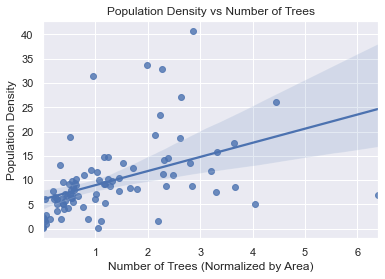

In [789]:
plot = sns.regplot(x = 'tree_count', y = 'Pop__2010', data = combined_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Population Density",
title = "Population Density vs Number of Trees")

**Inference: People might prefer to live in neighborhoods with a higher green cover due to the aesthetic appeal/ other benefits**

# Tree density vs Crime rate density (i.e crimes per unit area) per neighborhood

In [790]:
crime_rate_density_map = combined_data[['neighborhood', 'SNAP_All_csv__Part_1__Major_Cri']].copy()

In [791]:
fig=px.choropleth(crime_rate_density_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='SNAP_All_csv__Part_1__Major_Cri',
              color_continuous_scale='reds',
               title='Crimes Density across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Crime Rate(Normalized by Area)'),
 Text(0.5, 1.0, 'Crime Rate vs Number of Trees')]

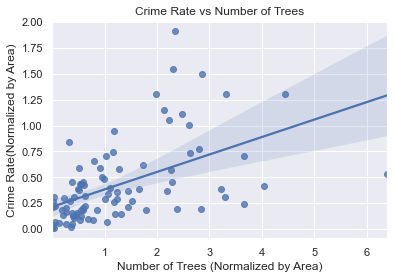

In [792]:
plot = sns.regplot(x = 'tree_count', y = 'SNAP_All_csv__Part_1__Major_Cri', data = combined_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Crime Rate(Normalized by Area)",
title = "Crime Rate vs Number of Trees")

**Inference: We have already established that the population density is higher in neighborhoods with a higher green cover.**

**Since, more crimes are bound to happen in neighborhoods with a higher population density, we observe a higher crime rate in areas with higher tree densities.**

# Tree density vs how landslide prone the neighborhood is

In [793]:
landslide_map = combined_data[['neighborhood', 'SNAP_All_csv_Landslide_Prone___']].copy()

In [794]:
fig=px.choropleth(landslide_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='SNAP_All_csv_Landslide_Prone___',
              color_continuous_scale='brwnyl',
               title='Landslide susceptibility across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Landslide susceptibility'),
 Text(0.5, 1.0, 'Landslide susceptibility vs Number of Trees')]

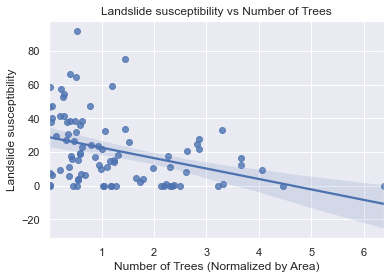

In [795]:
plot = sns.regplot(x = 'tree_count', y = 'SNAP_All_csv_Landslide_Prone___', data = combined_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Landslide susceptibility",
title = "Landslide susceptibility vs Number of Trees")

**Inference: We see a negative correlation between the Landslide susceptibility and tree density. This should be expected as trees reduce soil erosion and lower soil moisture levels, thereby lowering the risk of landslides.**

# Tree density vs how Flooding prone the neighborhood is 

In [796]:
flooding_map = combined_data[['neighborhood', 'SNAP_All_csv_Flood_Plain____lan']].copy()

In [797]:
fig=px.choropleth(flooding_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='SNAP_All_csv_Flood_Plain____lan',
              color_continuous_scale='blues',
               title='Flooding susceptibility across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Flooding susceptibility'),
 Text(0.5, 1.0, 'Flooding susceptibility vs Number of Trees')]

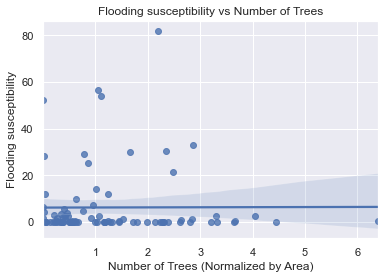

In [798]:
plot = sns.regplot(x = 'tree_count', y = 'SNAP_All_csv_Flood_Plain____lan', data = combined_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Flooding susceptibility",
title = "Flooding susceptibility vs Number of Trees")

**Inference: We do not observe any correlation between Flooding susceptibility and tree density.**

# Correlating tree stumps/vacant sites with different socio-economic factors

**These socio-economic factors include Percent under poverty, income of the people, crimes**

In [799]:
df_stump_vacant = raw_df_trees[(raw_df_trees['common_name'] == 'Stump') | 
                       (raw_df_trees['scientific_name'] == 'Stump') |
                       (raw_df_trees['common_name'] == 'Vacant Site Small') | 
                       (raw_df_trees['common_name'] == 'Vacant Site Medium') | 
                       (raw_df_trees['common_name'] == 'Vacant Site Not Suitable') | 
                       (raw_df_trees['common_name'] == 'Vacant Site Large')]

In [800]:
df_stump_vacant.shape

(5270, 58)

In [801]:
len(df_stump_vacant.index)

5270

In [802]:
# df_stump_vacant['tree_count'] = pd.Series([1 for x in range(len(df_stump_vacant.index))])
df_stump_vacant['tree_count'] = 1

<ipython-input-802-bd81044c7d7c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [803]:
df_stump_vacant['tree_count'].sum()

5270

In [804]:
df_stump_density = df_stump_vacant[['neighborhood', 'tree_count', 'stormwater_benefits_dollar_value', 
                            'property_value_benefits_dollarvalue', 'energy_benefits_electricity_dollar_value', 
                            'energy_benefits_gas_dollar_value', 'air_quality_benfits_total_dollar_value', 
                           'co2_benefits_dollar_value', 'overall_benefits_dollar_value', ]]

In [805]:
df_stump_density['tree_count'].sum()

5270

In [806]:
df_stump_density.groupby(['neighborhood']).sum()

,tree_count
neighborhood,
Allegheny Center,6
Allegheny West,18
Allentown,24
Arlington,25
Arlington Heights,1
Banksville,16
Bedford Dwellings,31
Beechview,68
Beltzhoover,58


In [807]:
df_stump_density['tree_count'].sum()

5270

In [808]:
df_stump_density = df_stump_density.astype(convert_dict)

In [809]:
df_stump_density = df_stump_density.groupby('neighborhood', as_index=False).agg({"tree_count": "sum", 
                                                            "stormwater_benefits_dollar_value": "sum",
                                                            "property_value_benefits_dollarvalue": "sum",
                                                            "energy_benefits_electricity_dollar_value": "sum",
                                                            "energy_benefits_gas_dollar_value": "sum",
                                                            "air_quality_benfits_total_dollar_value": "sum",
                                                            "co2_benefits_dollar_value": "sum",
                                                            "overall_benefits_dollar_value": "sum"})

In [810]:
combined_stump = df_stump_density.merge(neighborhood_data_area, on='neighborhood', how='left')

In [811]:
combined_stump[['tree_count', 'stormwater_benefits_dollar_value', 'property_value_benefits_dollarvalue', 
               'energy_benefits_electricity_dollar_value', 'energy_benefits_gas_dollar_value',
              'air_quality_benfits_total_dollar_value', 'co2_benefits_dollar_value', 'overall_benefits_dollar_value',
               'Pop__2010', 'SNAP_All_csv__Part_1__Major_Cri']] = combined_stump[['tree_count', 'stormwater_benefits_dollar_value', 'property_value_benefits_dollarvalue', 
               'energy_benefits_electricity_dollar_value', 'energy_benefits_gas_dollar_value',
              'air_quality_benfits_total_dollar_value', 'co2_benefits_dollar_value', 'overall_benefits_dollar_value',
               'Pop__2010', 'SNAP_All_csv__Part_1__Major_Cri']].div(combined_stump.Neighborhood_2010_ACRES, axis=0)

# Plot neighborhood level stump/vacant site density data

In [812]:
stump_density_map = combined_stump[['neighborhood', 'tree_count']].copy()

In [813]:
fig=px.choropleth(stump_density_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='tree_count',
              color_continuous_scale='greens',
               title='Average Tree Density (trees per acre) across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [814]:
stump_density_map.sort_values('tree_count', ascending=False).head(5)

,neighborhood,tree_count
33,Friendship,0.849232
59,Point Breeze North,0.783541
46,Manchester,0.718399
39,Homewood South,0.620868
23,Crawford-Roberts,0.602043


# Stump/Vacant site density vs Population density per neighborhood

[Text(0.5, 0, 'Number of Stumps/Vacant sites (Normalized by Area)'),
 Text(0, 0.5, 'Population Density'),
 Text(0.5, 1.0, 'Population Density vs Number of Stumps/Vacant sites')]

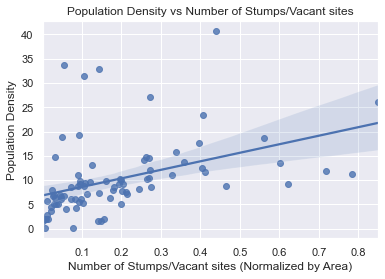

In [815]:
plot = sns.regplot(x = 'tree_count', y = 'Pop__2010', data = combined_stump)
plot.set(xlabel = "Number of Stumps/Vacant sites (Normalized by Area)", ylabel = "Population Density",
title = "Population Density vs Number of Stumps/Vacant sites")

**Inference: More trees chopped off and vacant sites created in more denseley populated neighborhoods to build other stuff.**

# Stump/Vacant site density vs Crime rate density (i.e crimes per unit area) per neighborhood

[Text(0.5, 0, 'Number of Stumps/Vacant sites (Normalized by Area)'),
 Text(0, 0.5, 'Crime Rate(Normalized by Area)'),
 Text(0.5, 1.0, 'Crime Rate vs Number of Stumps/Vacant sites')]

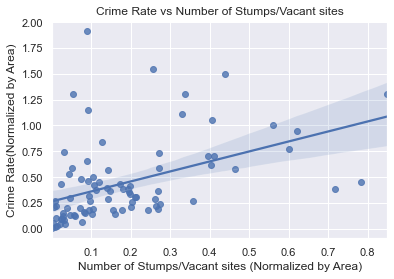

In [816]:
plot = sns.regplot(x = 'tree_count', y = 'SNAP_All_csv__Part_1__Major_Cri', data = combined_stump)
plot.set(xlabel = "Number of Stumps/Vacant sites (Normalized by Area)", ylabel = "Crime Rate(Normalized by Area)",
title = "Crime Rate vs Number of Stumps/Vacant sites")

**Inference: More stumps in more densely populated areas, and more crime in more denseley populated areas. Hence, its expected to see more crimes in areas with higher stump density**

# Stump/Vacant site density vs Poverty (i.e % of the population under poverty) per neighborhood



[Text(0.5, 0, 'Number of Stumps/Vacant sites (Normalized by Area)'),
 Text(0, 0.5, 'Percentage population under poverty'),
 Text(0.5, 1.0, 'Crime Rate vs Number of Stumps/Vacant sites')]

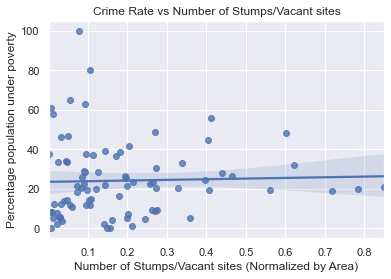

In [817]:
plot = sns.regplot(x = 'tree_count', y = 'Est__Percent_Under_Poverty__201', data = combined_stump)
plot.set(xlabel = "Number of Stumps/Vacant sites (Normalized by Area)", ylabel = "Percentage population under poverty",
title = "Crime Rate vs Number of Stumps/Vacant sites")

**Inference: No correlation observed**

# Stump/Vacant site density vs Median Income per neighborhood

[Text(0.5, 0, 'Number of Stumps/Vacant sites (Normalized by Area)'),
 Text(0, 0.5, 'Median income'),
 Text(0.5, 1.0, 'Median income vs Number of Stumps/Vacant sites')]

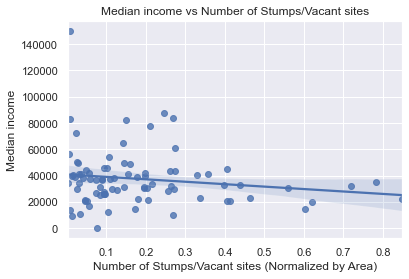

In [818]:
plot = sns.regplot(x = 'tree_count', y = 'SNAP_All_csv_2009_Median_Income', data = combined_stump)
plot.set(xlabel = "Number of Stumps/Vacant sites (Normalized by Area)", ylabel = "Median income",
title = "Median income vs Number of Stumps/Vacant sites")

**Inference: No correlation observed**